# ChatBot Logs
Questions 1-4: I used an image in this chat and it seems that if an image is used, the chat cannot be shared. So instead, I have copy and pasted the entire chat into a google document. If you scroll all the way to the bottom, I have also included screenshots of the entire chat. Here is a link to that document: https://docs.google.com/document/d/12mM370N-PBiTkPhKX8sLkGa7SjQJL0fIapCqDTF3ugM/edit?usp=sharing

Questions 5-8: https://chatgpt.com/share/66f5c4b1-e950-8011-bf25-ce93098a7409

In [1]:
import pandas as pd 
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


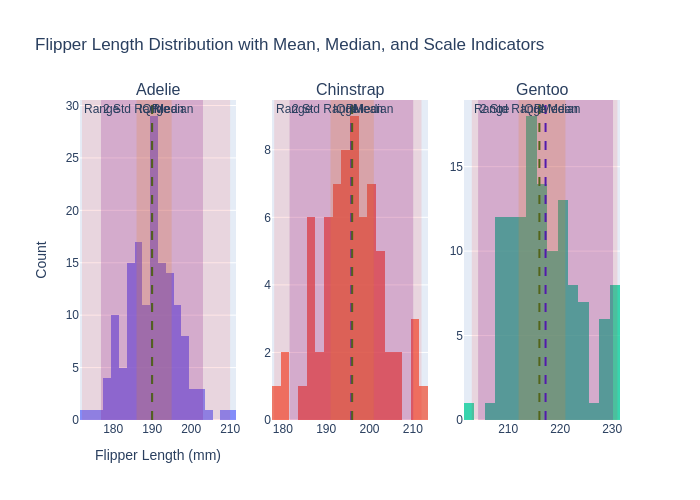

In [2]:
# Question 1
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Filter out rows with missing values in flipper_length_mm
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Create subplots for each species
species_list = penguins['species'].unique()
fig = make_subplots(rows=1, cols=len(species_list), subplot_titles=species_list)

# Loop through each species to create the plot
for i, species in enumerate(species_list):
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']
    
    # Calculate statistics
    mean_flipper = species_data.mean()
    median_flipper = species_data.median()
    min_flipper = species_data.min()
    max_flipper = species_data.max()
    q1_flipper = species_data.quantile(0.25)
    q3_flipper = species_data.quantile(0.75)
    std_flipper = species_data.std()
    
    # Range defined by two standard deviations from the mean
    two_std_range = (mean_flipper - 2 * std_flipper, mean_flipper + 2 * std_flipper)
    
    # Create histogram for this species
    hist = go.Histogram(x=species_data, nbinsx=20, name=species, opacity=0.75)
    
    # Add the histogram to the subplot
    fig.add_trace(hist, row=1, col=i+1)
    
    # Add vertical lines for the mean and median
    fig.add_vline(x=mean_flipper, line=dict(color='blue', dash='dash'), row=1, col=i+1,
                  annotation_text="Mean", annotation_position="top right")
    fig.add_vline(x=median_flipper, line=dict(color='green', dash='dash'), row=1, col=i+1,
                  annotation_text="Median", annotation_position="top right")
    
    # Add vertical rectangles for range, IQR, and two std dev range
    fig.add_vrect(x0=min_flipper, x1=max_flipper, fillcolor="red", opacity=0.1, line_width=0, row=1, col=i+1,
                  annotation_text="Range", annotation_position="top left")
    fig.add_vrect(x0=q1_flipper, x1=q3_flipper, fillcolor="orange", opacity=0.2, line_width=0, row=1, col=i+1,
                  annotation_text="IQR", annotation_position="top left")
    fig.add_vrect(x0=two_std_range[0], x1=two_std_range[1], fillcolor="purple", opacity=0.2, line_width=0, row=1, col=i+1,
                  annotation_text="2 Std Range", annotation_position="top left")

# Update layout
fig.update_layout(title="Flipper Length Distribution with Mean, Median, and Scale Indicators",
                  xaxis_title="Flipper Length (mm)",
                  yaxis_title="Count",
                  showlegend=False)

# Show the plot
fig.show(renderer="png")

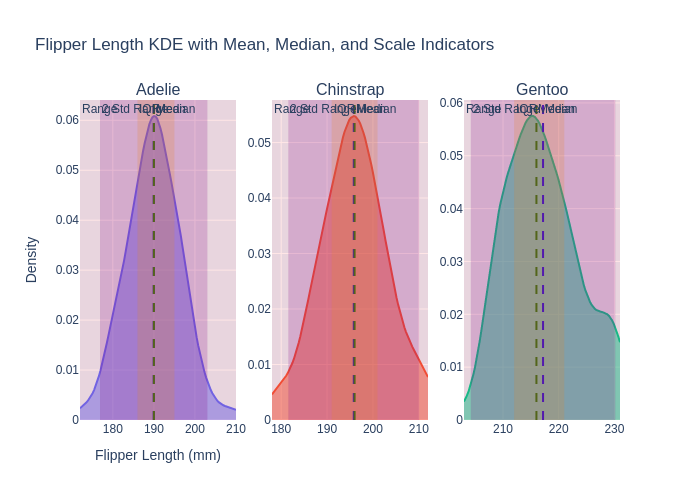

In [3]:
# Question 2
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import gaussian_kde

# Create subplots for each species
species_list = penguins['species'].unique()
fig = make_subplots(rows=1, cols=len(species_list), subplot_titles=species_list)

# Loop through each species to create the plot
for i, species in enumerate(species_list):
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']
    
    # Calculate statistics
    mean_flipper = species_data.mean()
    median_flipper = species_data.median()
    min_flipper = species_data.min()
    max_flipper = species_data.max()
    q1_flipper = species_data.quantile(0.25)
    q3_flipper = species_data.quantile(0.75)
    std_flipper = species_data.std()
    
    # Range defined by two standard deviations from the mean
    two_std_range = (mean_flipper - 2 * std_flipper, mean_flipper + 2 * std_flipper)
    
    # Create KDE using scipy
    kde = gaussian_kde(species_data)
    x = np.linspace(min_flipper, max_flipper, 100)
    y = kde(x)
    
    # Add KDE plot to Plotly figure
    fig.add_trace(go.Scatter(x=x, y=y, fill='tozeroy', name=species, opacity=0.5), row=1, col=i+1)
    
    # Add vertical lines for the mean and median
    fig.add_vline(x=mean_flipper, line=dict(color='blue', dash='dash'), row=1, col=i+1,
                  annotation_text="Mean", annotation_position="top right")
    fig.add_vline(x=median_flipper, line=dict(color='green', dash='dash'), row=1, col=i+1,
                  annotation_text="Median", annotation_position="top right")
    
    # Add vertical rectangles for range, IQR, and two std dev range
    fig.add_vrect(x0=min_flipper, x1=max_flipper, fillcolor="red", opacity=0.1, line_width=0, row=1, col=i+1,
                  annotation_text="Range", annotation_position="top left")
    fig.add_vrect(x0=q1_flipper, x1=q3_flipper, fillcolor="orange", opacity=0.2, line_width=0, row=1, col=i+1,
                  annotation_text="IQR", annotation_position="top left")
    fig.add_vrect(x0=two_std_range[0], x1=two_std_range[1], fillcolor="purple", opacity=0.2, line_width=0, row=1, col=i+1,
                  annotation_text="2 Std Range", annotation_position="top left")

# Update layout
fig.update_layout(title="Flipper Length KDE with Mean, Median, and Scale Indicators",
                  xaxis_title="Flipper Length (mm)",
                  yaxis_title="Density",
                  showlegend=False)

# Show the plot
fig.show(renderer="png")

## Question 3
**Describe your preference for one or the other and your rationale for this preference.**

Each data visualization method has its own advantages and disadvantages and there is no one plot that you should choose over the others in all senarios. Boxplots are less detailed but are more clear in showing summary statistics like outliers and quartiles. They are also useful for comparing multiple datasets. Histograms are better at representing distributions to identify skews but their bin sizes can have a large impact on the way it looks. Lastly KDEs provide a smoother visualization of the distribution but the bandwidth can have a large impact on how smooth it is (if it is too smooth, you will not be able to see the distribution shape because everything will look round).

I would personally choose the Kernel Distribution Estimator over the other two purely because I like the way it looks. However, I understand that each one has a unique purpose and would be better for specific tasks.

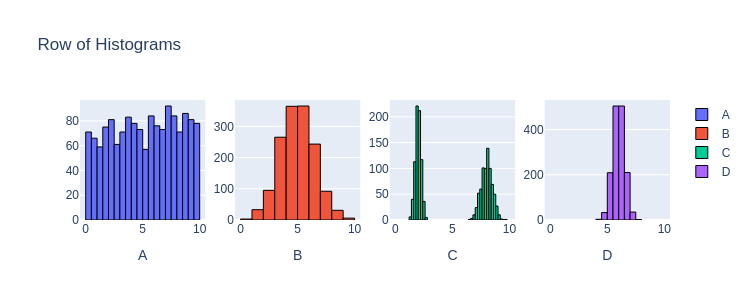

In [4]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

## Question 4
**1. Which datasets have similar means and similar variances?** None (but B and C is pretty close)

**2. Which datasets have similar means but quite different variances?** B and D

**3. Which datasets have similar variances but quite different means?** A and C

**4. Which datasets have quite different means and quite different variances?** A and D

## Question 5
Right skew is when the distribution of the data is asymmetrical and has a tail on the right side with the bulk of the data on the left. For right skewed data, its mean is often greater than its median. This is because the outlier points in the tail (on the right) are dragging the mean farther right. The median is less sensetive to the outliers because the median is more concerned about the number of points on either side than the actual values of those points. For example, if we had a normal dataset with a mean of 5 and we add a outlier, 100. This 100 will still only count as 1 extra point for the median but it will significantly increase the overall average (mean). Left skew is the opposite of right skew with its tail being on the left and the main data on the right. For left skewed data, the mean is often less than the median. This is due to the same reason as explain previously but simply mirrored.

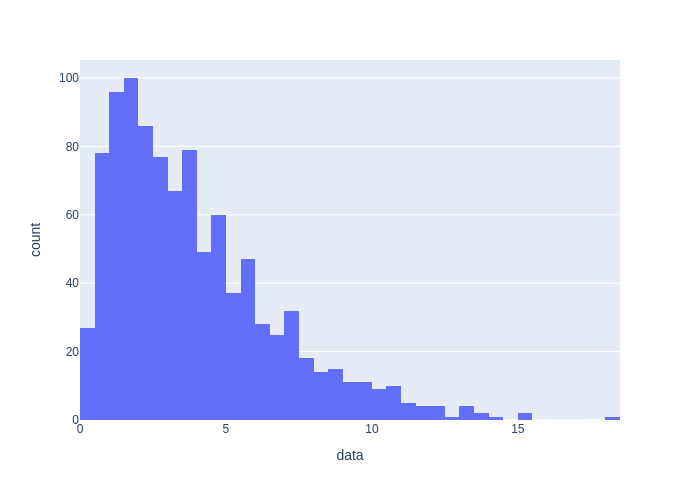

In [5]:
# Question 5
from scipy import stats #statistical functions and probability distributions
import pandas as pd # data manipulation and analysis
import numpy as np # numerical operations
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000) # generates a 1000 element sample with right skew
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data") # plots the sample
fig1.show(renderer="png")

sample1.mean() # mean
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000) # generates a 1000 element sample with left skew

In [6]:
# Question 6
games = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/master/data/2019/2019-07-30/video_games.csv")

# 1. Remove rows with missing values
games_cleaned = games.dropna()

# 2. Determine the number of rows and columns
rows, cols = games_cleaned.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")

# 3. Determine the column data types
print("Column Data Types:")
print(games_cleaned.dtypes)

# 4. Find mean, median, mode, and standard deviation for numerical columns
print("Statistical Summary:")

mean_values = games_cleaned.mean(numeric_only=True)
print("\nMean values:")
print(mean_values)

median_values = games_cleaned.median(numeric_only=True)
print("\nMedian values:")
print(median_values)

mode_values = games_cleaned.mode(numeric_only=True)
print("\nMode values:")
print(mode_values)

std_values = games_cleaned.std(numeric_only=True)
print("\nStandard Deviation values:")
print(std_values)

Number of rows: 2668
Number of columns: 10
Column Data Types:
number                int64
game                 object
release_date         object
price               float64
owners               object
developer            object
publisher            object
average_playtime    float64
median_playtime     float64
metascore           float64
dtype: object
Statistical Summary:

Mean values:
number              157.211769
price                15.940780
average_playtime     39.564093
median_playtime      23.875562
metascore            71.902924
dtype: float64

Median values:
number              117.00
price                14.99
average_playtime      0.00
median_playtime       0.00
metascore            73.00
dtype: float64

Mode values:
   number  price  average_playtime  median_playtime  metascore
0       1   9.99               0.0              0.0       80.0
1       2    NaN               NaN              NaN        NaN
2       3    NaN               NaN              NaN        NaN
3      

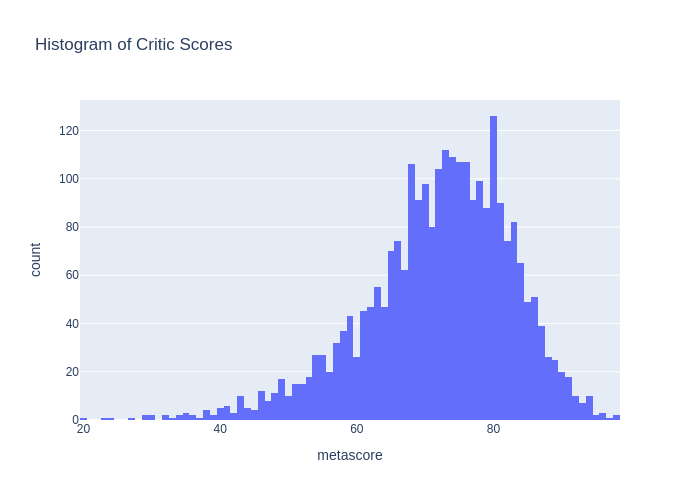

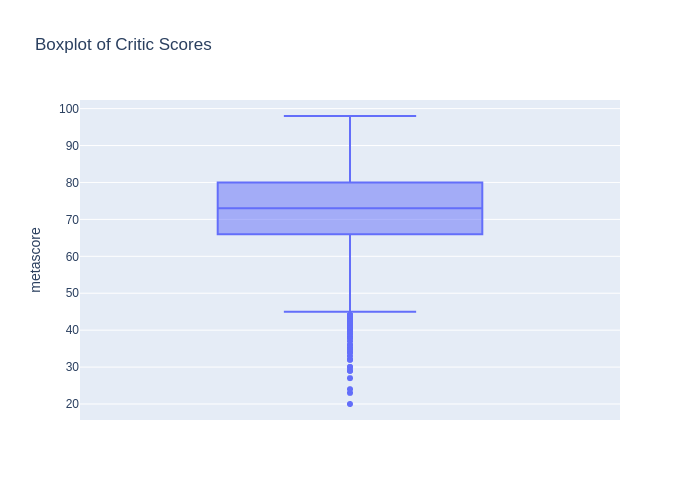

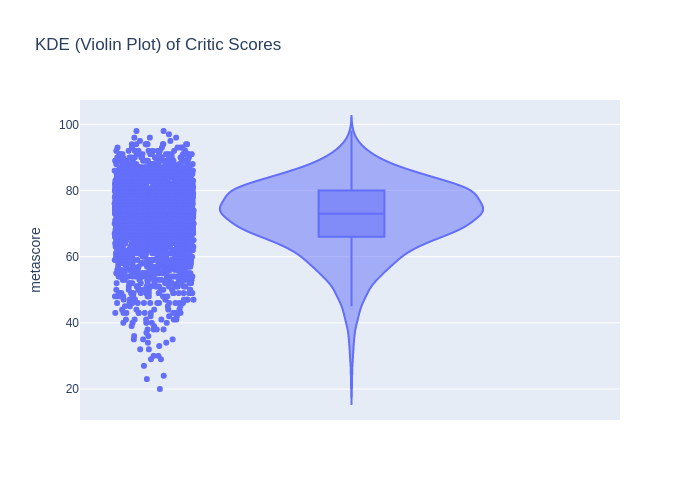

In [7]:
# Question 6 continued
column_to_visualize = 'metascore'

# 1. Histogram
histogram = px.histogram(games_cleaned, x=column_to_visualize, title='Histogram of Critic Scores')
histogram.show(renderer="png")

# 2. Boxplot
boxplot = px.box(games_cleaned, y=column_to_visualize, title='Boxplot of Critic Scores')
boxplot.show(renderer="png")

# 3. Kernel Density Estimate (KDE)
kde = px.violin(games_cleaned, y=column_to_visualize, box=True, points="all", title='KDE (Violin Plot) of Critic Scores')
kde.show(renderer="png")

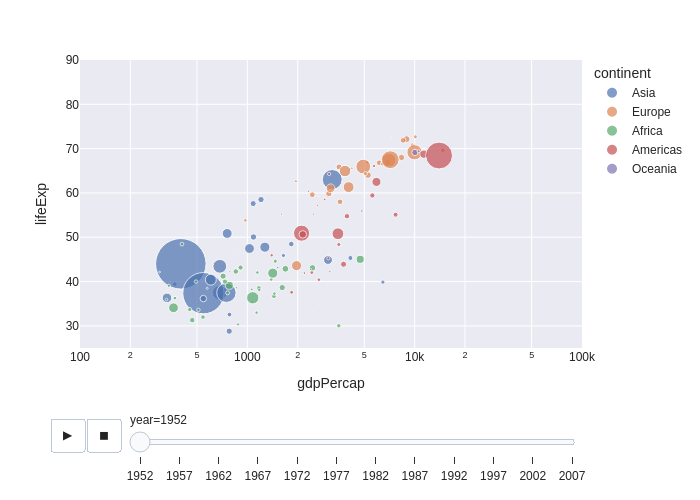

In [12]:
# Question 7 (taken from https://plotly.com/python/animations/)
df = px.data.gapminder()
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, template="seaborn", range_x=[100,100000], range_y=[25,90])
fig.show(renderer="png")

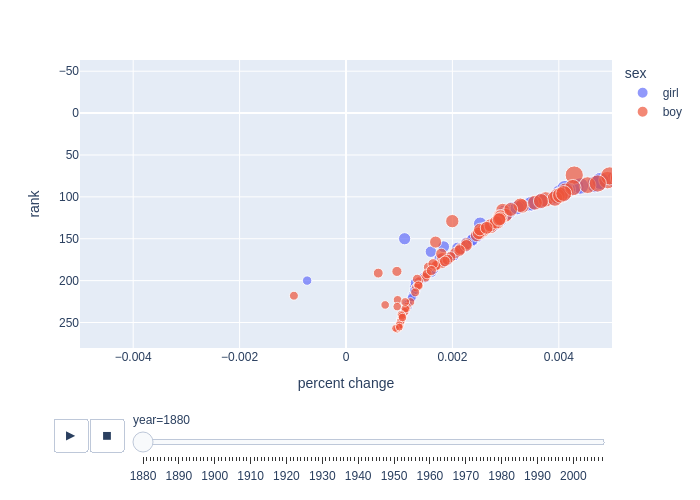

In [17]:
# Question 8
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex']
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])

bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001]

fig = px.scatter(
    bn,
    x="percent change",
    y="rank",
    animation_frame="year",
    animation_group="name",
    size="percent", color="sex",
    hover_name="name",
    size_max=50,
    range_x=[-0.005,0.005]
)

fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png")